# Explore Homfam 

In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import OrderedDict
from Bio import SeqIO


homfam_path_combined = "/home/luisasantus/Desktop/crg_cluster/data/structural_regression/homfam/combinedSeqs"
homfam_path_ref = "/home/luisasantus/Desktop/crg_cluster/data/structural_regression/homfam/refs"


exthomfam_path_combined_v35uniprot = "/home/luisasantus/Desktop/crg_cluster/data/structural_regression/extHomfam_v35-uniprot/"
exthomfam_path_ref_v35uniprot = "/home/luisasantus/Desktop/crg_cluster/data/structural_regression/extHomfam_v35-uniprot/ref"


exthomfam_path_combined_v33ncbi = "/home/luisasantus/Desktop/crg_cluster/data/structural_regression/extHomfam_v33.1-ncbi/"
exthomfam_path_ref_v33ncbi = "/home/luisasantus/Desktop/crg_cluster/data/structural_regression/extHomfam_v33.1-ncbi/ref"


outdir = "../../../data/structural_regression/plots/01_homfam/"

### Order data

In [2]:
def get_stats(f, extended = False):
    fasta_sequences = SeqIO.parse(open(f),'fasta')

    ls = []
    n_sequences = 0 

    for fasta in fasta_sequences:
        name, sequence = fasta.id, str(fasta.seq)
        n_sequences = n_sequences + 1
        l = len(sequence.replace("-", ""))
        ls.append(l)
        # if extended, save all infos about the sequences
        

    entry = pd.DataFrame({"file": [os.path.basename(f).replace(".fa", "")],
                          "n_sequences": [n_sequences],
                          "mean_length": [np.mean(ls)],
                          "min_length": [np.min(ls)],
                          "max_length": [np.max(ls)]})       


    return(entry)

In [3]:
def get_summary_df(homfam_path, subset = ""):
    summary_homfam = pd.DataFrame()
    max_steps = float("Inf")
    i = 0 
    for filename in os.listdir(homfam_path):
        i = i+1
        if(i>max_steps): 
            break
        f = os.path.join(homfam_path, filename)
        # checking if it is a file
        if os.path.isfile(f):
            entry = get_stats(f)
            summary_homfam = summary_homfam.append(entry, ignore_index= True)
    summary_homfam["family"] = summary_homfam.file.str.replace(".ref", "", regex = False)
    summary_homfam["subset"] = subset
    summary_homfam.sort_values(by=['family'])

    column_names = ["family", "subset", "n_sequences","mean_length", "min_length", "max_length", "file"]
    summary_homfam = summary_homfam.reindex(columns=column_names)
    return(summary_homfam)

#### Homfam

In [4]:
summary_homfam_combined = get_summary_df(homfam_path_combined, "combined")
summary_homfam_ref = get_summary_df(homfam_path_ref, "ref")
summary_homfam_combined = summary_homfam_combined.sort_values("n_sequences", ascending=False)

/tmp/ipykernel_80086/1054343901.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  summary_homfam = summary_homfam.append(entry, ignore_index= True)
/tmp/ipykernel_80086/1054343901.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  summary_homfam = summary_homfam.append(entry, ignore_index= True)


In [5]:
summary_homfam_combined[summary_homfam_combined.n_sequences < 400 ]

,family,subset,n_sequences,mean_length,min_length,max_length,file
71,cyt3,combined,385,92.306494,52,127,cyt3
63,scorptoxin,combined,363,53.256198,22,69,scorptoxin
90,hip,combined,167,66.209581,54,85,hip
65,seatoxin,combined,93,43.634409,34,50,seatoxin
47,test,combined,4,46.500000,36,50,test


In [6]:
summary_homfam_merged = summary_homfam_ref.merge(summary_homfam_combined,on='family')
summary_homfam_merged["perc_ref_total"] = (summary_homfam_merged.n_sequences_x * 100)/(summary_homfam_merged.n_sequences_y)

In [7]:
summary_homfam_merged.head(2)

,family,subset_x,n_sequences_x,mean_length_x,min_length_x,max_length_x,file_x,subset_y,n_sequences_y,mean_length_y,min_length_y,max_length_y,file_y,perc_ref_total
0,Stap_Strp_toxin,ref,6,220.333333,190,238,Stap_Strp_toxin.ref,combined,640,87.392188,20,238,Stap_Strp_toxin,0.937500
1,sodfe,ref,8,198.500000,186,205,sodfe.ref,combined,4455,77.447138,17,205,sodfe,0.179574


### ExtHomfam 

In [8]:
def get_extHomfam(exthomfam_path_combined):
    summary_exthomfam_small = get_summary_df(os.path.join(exthomfam_path_combined, "small"), "combined")
    summary_exthomfam_medium = get_summary_df(os.path.join(exthomfam_path_combined, "medium"), "combined")
    summary_exthomfam_large = get_summary_df(os.path.join(exthomfam_path_combined, "large"), "combined")
    summary_exthomfam_xlarge = get_summary_df(os.path.join(exthomfam_path_combined, "xlarge"), "combined")
    summary_exthomfam_huge = get_summary_df(os.path.join(exthomfam_path_combined, "huge"), "combined")
    summary_exthomfam_small["size_group"] = "small"
    summary_exthomfam_medium["size_group"] = "medium"
    summary_exthomfam_large["size_group"] = "large"
    summary_exthomfam_xlarge["size_group"] = "xlarge"
    summary_exthomfam_huge["size_group"] = "huge"
    summary_exthomfam_combined = pd.concat([summary_exthomfam_small, summary_exthomfam_medium, summary_exthomfam_large, summary_exthomfam_xlarge, summary_exthomfam_huge])
    return(summary_exthomfam_combined)

def get_extHomfam_merged(summary_exthomfam_combined, exthomfam_path_ref):
    summary_exthomfam_ref = get_summary_df(exthomfam_path_ref, "ref")
    summary_exthomfam_combined = summary_exthomfam_combined.sort_values("n_sequences", ascending=False)
    summary_exthomfam_merged = summary_exthomfam_ref.merge(summary_exthomfam_combined,on='family')
    summary_exthomfam_merged["perc_ref_total"] = (summary_exthomfam_merged.n_sequences_x * 100)/(summary_exthomfam_merged.n_sequences_y)
    return(summary_exthomfam_merged)

In [15]:
# Load v35-uniprot 
summary_exthomfam_combined_v35uniprot = get_extHomfam(exthomfam_path_combined_v35uniprot)
summary_exthomfam_merged_v35uniprot = get_extHomfam_merged(summary_exthomfam_combined_v35uniprot, exthomfam_path_ref_v35uniprot)

In [16]:
summary_exthomfam_combined_v35uniprot.head()

,family,subset,n_sequences,mean_length,min_length,max_length,file,size_group
0,cbm12,combined,1851,24.632631,17,62,cbm12,small
1,bv,combined,1500,175.394000,48,229,bv,small
2,CBM_20,combined,9636,83.017954,26,118,CBM_20,small
3,ghf11,combined,4041,168.280871,33,230,ghf11,small
4,pot,combined,2194,61.047858,22,82,pot,small


In [17]:
# Load v33-ncbi 
summary_exthomfam_combined_v33ncbi = get_extHomfam(exthomfam_path_combined_v33ncbi)
summary_exthomfam_merged_v33ncbi = get_extHomfam_merged(summary_exthomfam_combined_v33ncbi, exthomfam_path_ref_v33ncbi)

## Comparison homfam and extHomfam

In [18]:
# Prep exthomfam 
def get_size_df(summary_exthomfam_combined, dataset):
    df_size_exthomfam = pd.DataFrame(summary_exthomfam_combined.groupby("size_group").size()).reset_index()
    df_size_exthomfam = df_size_exthomfam.rename(columns={0: "n"})
    df_size_exthomfam["dataset"] = dataset
    df_size_exthomfam['size_group'] = pd.Categorical(
        df_size_exthomfam['size_group'], 
        categories=["small", "medium", "large", "xlarge", "huge"], 
        ordered=True
    )
    return(df_size_exthomfam)

In [17]:
# Old here - using the labels in the folder structure 
#df_size_exthomfam_v35 = get_size_df(summary_exthomfam_combined_v35uniprot, "extHomfam_v35-uniprot")
#df_size_exthomfam_v33 = get_size_df(summary_exthomfam_combined_v33ncbi, "extHomfam_v33-ncbi")

In [19]:
summary_exthomfam_combined_v35uniprot

,family,subset,n_sequences,mean_length,min_length,max_length,file,size_group
0,cbm12,combined,1851,24.632631,17,62,cbm12,small
1,bv,combined,1500,175.394000,48,229,bv,small
2,CBM_20,combined,9636,83.017954,26,118,CBM_20,small
3,ghf11,combined,4041,168.280871,33,230,ghf11,small
4,pot,combined,2194,61.047858,22,82,pot,small
...,...,...,...,...,...,...,...,...
31,Epimerase,combined,312340,208.700451,17,351,Epimerase,huge
32,transketolase_PC,combined,272226,143.234371,26,343,transketolase_PC,huge
33,ech,combined,284628,221.023480,29,296,ech,huge
34,Extradiol_dioxy,combined,267150,118.024365,20,353,Extradiol_dioxy,huge


In [13]:
# Prep homfam
# Add group sizes
#[200,10k), [10k,40k), [40k,100k), [100k,250k), [250k,3M).
#thresholds = [4000,10000,25000,415519]
thresholds = [10000,40000,100000,250000]
thresholds_str = list(["[0,10k)", "[10k,40k)", "[40k,100k)", "[100k,250k)", "[250k,3M)"])
def get_size_families(summary_homfam_combined, thresholds = thresholds): 
    summary_homfam_combined["size_group"] = "huge"
    summary_homfam_combined.loc[summary_homfam_combined.n_sequences < thresholds[3], "size_group"] = "xlarge"
    summary_homfam_combined.loc[summary_homfam_combined.n_sequences < thresholds[2], "size_group"] = "large"
    summary_homfam_combined.loc[summary_homfam_combined.n_sequences < thresholds[1], "size_group"] = "medium"
    summary_homfam_combined.loc[summary_homfam_combined.n_sequences < thresholds[0], "size_group"] = "small"
    return(summary_homfam_combined)

In [32]:
summary_homfam_combined = get_size_families(summary_homfam_combined)
summary_homfam_combined[summary_homfam_combined.family.isin(list(["rnasemam", "ghf10", "HMG_box", "egf", "rhv",  "biotin_lipoyl", "adh", "Acetyltransf"
                                                               ]))]

,family,subset,n_sequences,mean_length,min_length,max_length,file,size_group
18,Acetyltransf,combined,46285,82.989716,28,181,Acetyltransf,large
35,adh,combined,21331,123.640383,37,374,adh,medium
77,rhv,combined,17976,143.424010,31,854,rhv,medium
52,biotin_lipoyl,combined,11833,71.892758,30,106,biotin_lipoyl,medium
32,egf,combined,7774,32.076537,17,67,egf,small
38,HMG_box,combined,4779,66.071563,22,86,HMG_box,small
14,ghf10,combined,1502,220.340213,53,400,ghf10,small
89,rnasemam,combined,498,120.072289,62,140,rnasemam,small


In [14]:
summary_homfam_combined = get_size_families(summary_homfam_combined)
summary_exthomfam_combined_v35uniprot = get_size_families(summary_exthomfam_combined_v35uniprot)
summary_exthomfam_combined_v33ncbi = get_size_families(summary_exthomfam_combined_v33ncbi)

NameError: name 'summary_exthomfam_combined_v35uniprot' is not defined

In [22]:
summary_homfam_combined.size_group.value_counts()

small     75
medium    16
large      4
Name: size_group, dtype: int64

In [23]:
",".join(summary_homfam_combined[summary_homfam_combined.size_group == "small"].family)

'blm,egf,gpdh,lyase_1,int,subt,ldh,HLH,LIM,cyclo,proteasome,icd,msb,OTCace,HMG_box,flav,uce,peroxidase,sodfe,ghf1,cys,ace,glob,tim,hr,hormone_rec,hpr,oxidored_q6,asp,cytb,serpin,annexin,aadh,phc,ghf5,Ald_Xan_dh_2,mofe,Sulfotransfer,kunitz,GEL,tms,DMRL_synthase,KAS,sodcu,tgfb,ghf10,rub,mmp,cah,DEATH,cryst,kringle,az,il8,ltn,phoslip,slectin,trfl,ins,ChtBD,ghf22,ricin,profilin,Stap_Strp_toxin,sti,TNF,ghf11,toxin,bowman,rnasemam,cyt3,scorptoxin,hip,seatoxin,test'

In [ ]:
summary_homfam_combined.head(2)

In [24]:
df_size_homfam = get_size_df(summary_homfam_combined, "homfam")
df_size_exthomfam_v33 = get_size_df(summary_exthomfam_combined_v33ncbi, "exthomfam_v33")
df_size_exthomfam_v35 = get_size_df(summary_exthomfam_combined_v35uniprot, "exthomfam_v35")

In [25]:
## Merge
df_size = pd.concat([df_size_homfam, df_size_exthomfam_v33])
df_size = pd.concat([df_size, df_size_exthomfam_v35])
df_size.head(2)

,size_group,n,dataset
0,large,4,homfam
1,medium,16,homfam


## Plot homfam vs extHomfam 

In [26]:
# Calculate number of obs per group & median to position labels
nobs = thresholds
nobs = [str(x) for x in nobs]
nobs

['10000', '40000', '100000', '250000']

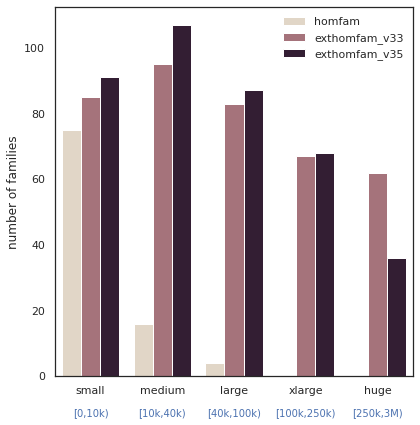

In [27]:
# ------------ Number of sequences -------------

sns.set_theme(style="white")
sns.set_context("notebook")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(6, 6))


# Plot the total crashes
sns.set_color_codes("deep")
sns.barplot(x="size_group", y="n", data=df_size,
            hue="dataset", palette="ch:.25")


 
# Add it to the plot
pos = range(len(thresholds_str))
for tick,label in zip(pos,ax.get_xticklabels()):
    ax.text(pos[tick],
            -12,
            thresholds_str[tick],
            horizontalalignment='center',
            size='small',
            color='b')
# Add a legend and informative axis label
ax.legend(ncol=1, loc="upper right", frameon=False)
ax.set(xlabel="")
ax.set(ylabel="number of families")
#sns.despine(left=True, bottom=True)
f.tight_layout()
plt.savefig(os.path.join(outdir, "00_nFamilies.pdf"))



In [30]:
# ------------ Perc Reference distribution -------------
# Homfam
perc_ref_homfam = summary_homfam_merged[["family", "perc_ref_total"]]
summary_homfam = summary_homfam_combined.merge(perc_ref_homfam, on="family")
# Ext homfam
perc_ref_exthomfam_v33ncbi = summary_exthomfam_merged_v33ncbi[["family", "perc_ref_total"]]
summary_exthomfam_v33ncbi = summary_exthomfam_combined_v33ncbi.merge(perc_ref_exthomfam_v33ncbi, on="family")
# Ext homfam
perc_ref_exthomfam_v35uniprot = summary_exthomfam_merged_v35uniprot[["family", "perc_ref_total"]]
summary_exthomfam_v35uniprot = summary_exthomfam_combined_v35uniprot.merge(perc_ref_exthomfam_v35uniprot, on="family")
#summary comb
summary_homfam["dataset"]="homfam"
summary_exthomfam_v33ncbi["dataset"]="extHomfam_v33-ncbi"
summary_exthomfam_v35uniprot["dataset"]="extHomfam_v35-uniprot"

In [44]:
summary_homfam_merged.columns = summary_homfam_merged.columns.str.replace("x", "ref").str.replace("y", "combined")
summary_homfam_merged_tosave = summary_homfam_merged

In [45]:
summary_homfam_merged_tosave.to_csv(os.path.join("/home/luisasantus/Desktop/crg_cluster/data/structural_regression/stats/", "02_summary_homfam_with_refs.csv"), index = False)

In [29]:
summary = pd.concat([summary_homfam, summary_exthomfam_v35uniprot])

NameError: name 'summary_homfam' is not defined

In [114]:
summary= summary.reset_index()
summary = summary.iloc[: , 1:]

In [115]:
summary.head(2)

,family,subset,n_sequences,mean_length,min_length,max_length,file,size_group,perc_ref_total,dataset
0,rvp,combined,93681,94.288554,22,133,rvp,xlarge,0.006405,homfam
1,zf-CCHH,combined,88345,23.251265,12,35,zf-CCHH,xlarge,0.016979,homfam


## -------------- Save Summary dataframe  --------------

In [116]:
summary.to_csv(os.path.join("/home/luisasantus/Desktop/crg_cluster/data/structural_regression/stats/", "01_summary_homfam_exthomfam.csv"), index = False)

In [117]:
summary.dataset.value_counts()

extHomfam_v35-uniprot    389
homfam                    94
Name: dataset, dtype: int64

## Visualize Homfam 

In [123]:
summary_homfam_combined.sort_values(by=['n_sequences']).iloc[:10].family


64      seatoxin
89           hip
62    scorptoxin
70          cyt3
88      rnasemam
11        bowman
53         toxin
12         ghf11
80           TNF
93           sti
Name: family, dtype: object

In [135]:
summary_exthomfam_combined[(summary_exthomfam_combined.family).isin(list(["scorptoxin"]))]

,family,subset,n_sequences,mean_length,min_length,max_length,file,size_group
64,scorptoxin,combined,796,50.747487,17,68,scorptoxin,small


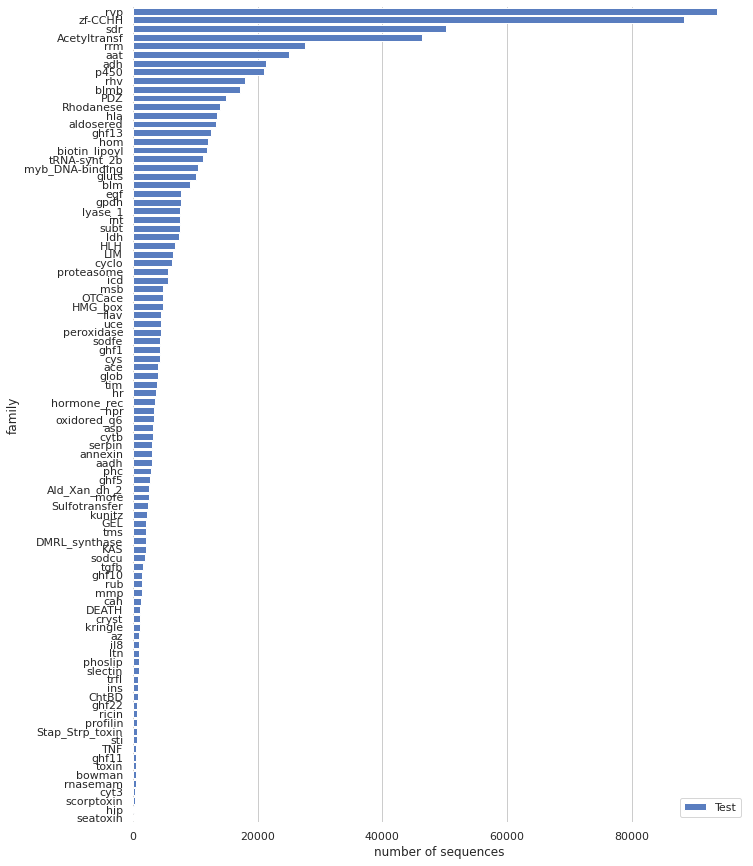

In [57]:
sns.set_theme(style="whitegrid")
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(11, 15))


# Plot the total crashes
sns.set_color_codes("pastel")
sns.set_color_codes("muted")
sns.barplot(x="n_sequences", y="family", data=summary_homfam_combined,
            label="Test", color="b")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlabel="number of sequences")
sns.despine(left=True, bottom=True)
plt.savefig(os.path.join(outdir, "01_test_seq.pdf"))


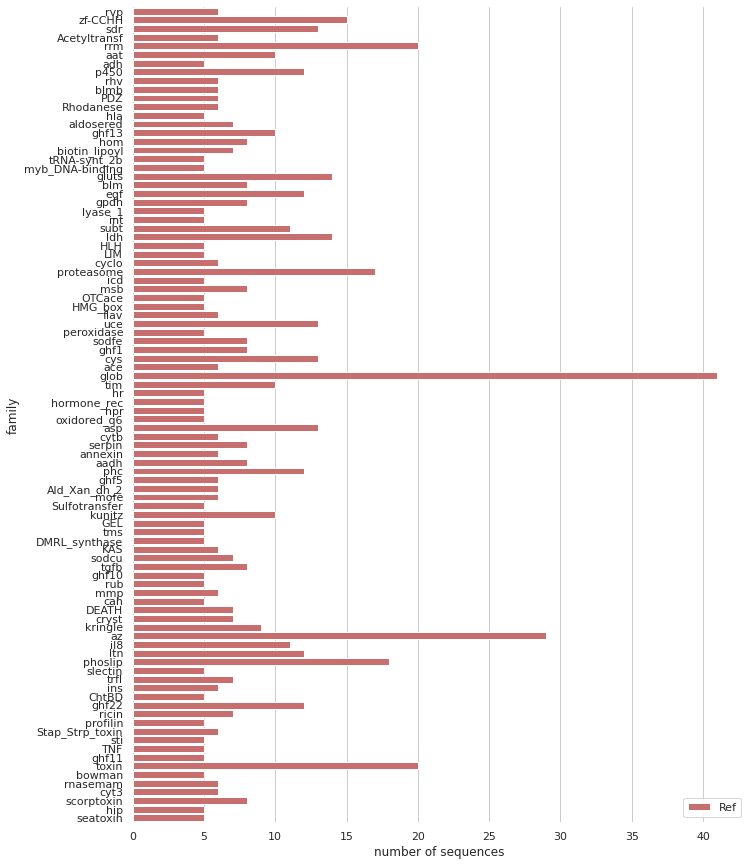

In [59]:
# Order as the one above
order_test =  list(OrderedDict.fromkeys(summary_homfam_combined.family))
order_test
summary_homfam_ref['family'] = pd.Categorical(
    summary_homfam_ref['family'], 
    categories=order_test, 
    ordered=True
)


sns.set_theme(style="whitegrid")
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(11, 15))


# Plot the total crashes
sns.set_color_codes("pastel")
sns.set_color_codes("muted")
sns.barplot(x="n_sequences", y="family", data=summary_homfam_ref,
            label="Ref", color="r")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlabel="number of sequences")
sns.despine(left=True, bottom=True)
plt.savefig(os.path.join(outdir, "02_refs_seq.pdf"))


In [60]:
summary_homfam_merged.head(2)

,family,subset_x,n_sequences_x,mean_length_x,min_length_x,max_length_x,file_x,subset_y,n_sequences_y,mean_length_y,min_length_y,max_length_y,file_y,perc_ref_total
0,Stap_Strp_toxin,ref,6,220.333333,190,238,Stap_Strp_toxin.ref,combined,640,87.392188,20,238,Stap_Strp_toxin,0.937500
1,sodfe,ref,8,198.500000,186,205,sodfe.ref,combined,4455,77.447138,17,205,sodfe,0.179574


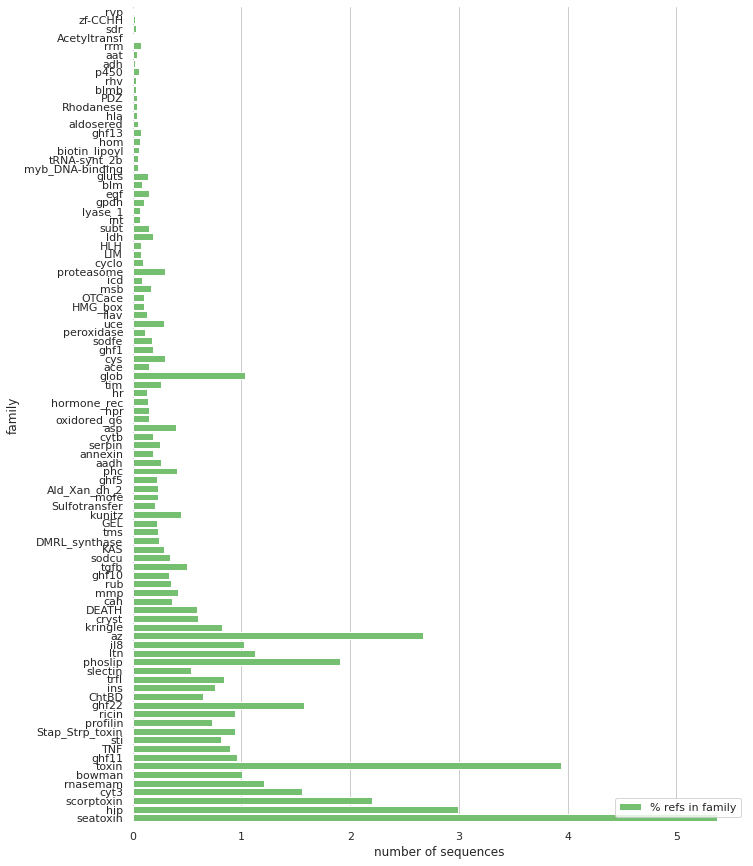

In [61]:
summary_homfam_merged['family'] = pd.Categorical(
    summary_homfam_merged['family'], 
    categories=order_test, 
    ordered=True
)
summary_homfam_merged

sns.set_theme(style="whitegrid")
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(11, 15))


# Plot the total crashes
sns.set_color_codes("pastel")
sns.set_color_codes("muted")
sns.barplot(x="perc_ref_total", y="family", data=summary_homfam_merged,
            label="% refs in family", color="g")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlabel="number of sequences")
sns.despine(left=True, bottom=True)
plt.savefig(os.path.join(outdir, "03_perc_ref_in_family.pdf"))


## Visualize extrenal Homfam 

In [124]:
summary_exthomfam_combined = summary_exthomfam_combined.sort_values("n_sequences", ascending=False)

In [128]:
list(["transket_pyr", "aat"])

['transket_pyr', 'aat']

In [134]:
summary_exthomfam_combined[(summary_exthomfam_combined.family).isin(list(["transket_pyr", "aat", "ABC_tran"]))]

,family,subset,n_sequences,mean_length,min_length,max_length,file,size_group
17,ABC_tran,combined,2606818,167.505647,18,2239,ABC_tran,huge
3,aat,combined,463223,319.823862,24,482,aat,huge
57,transket_pyr,combined,144526,168.601380,26,288,transket_pyr,xlarge


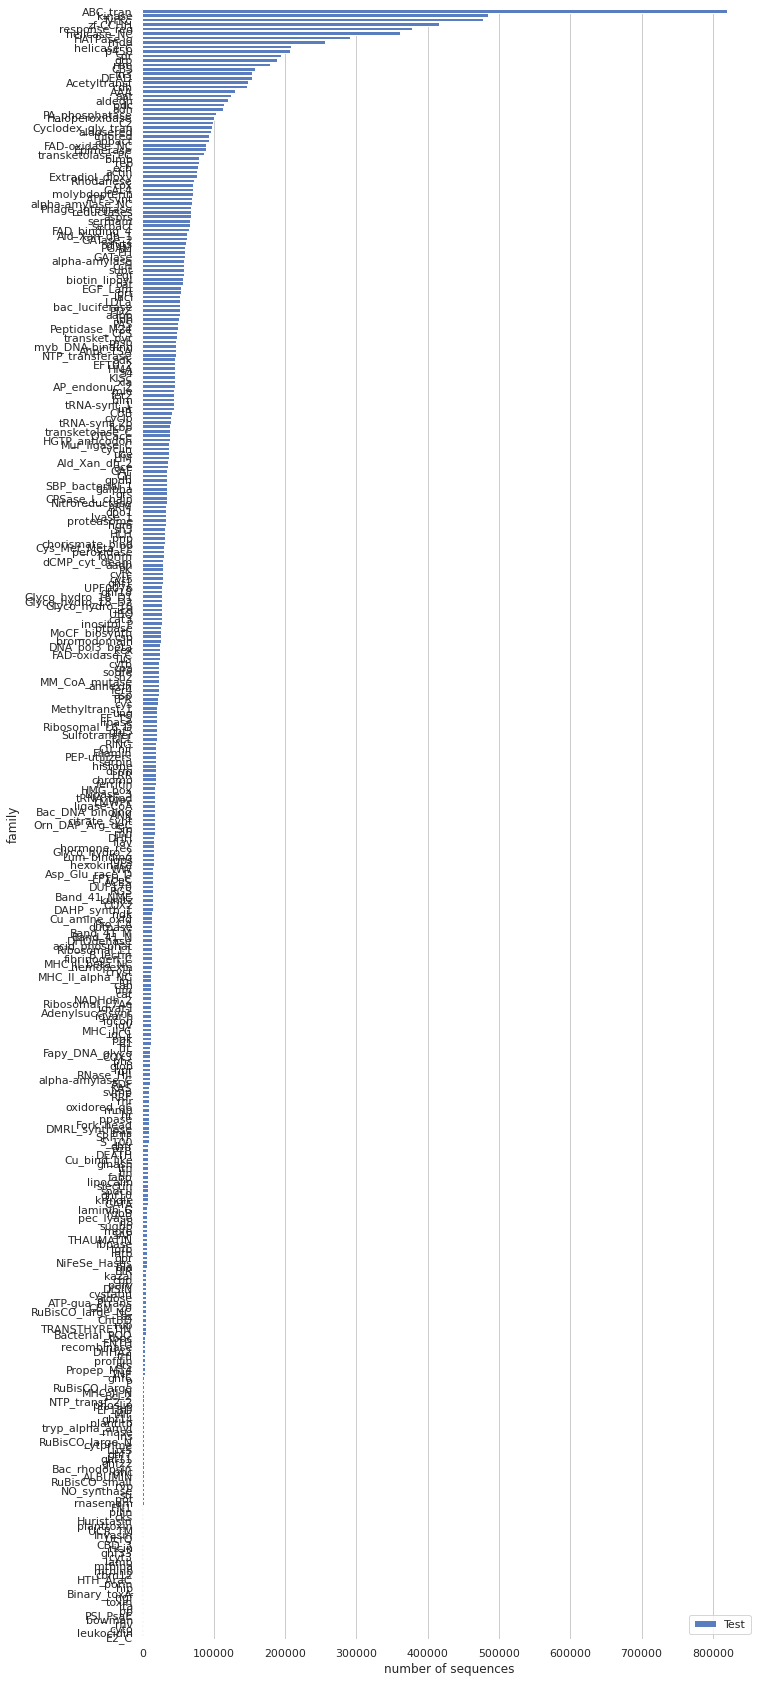

In [177]:
sns.set_theme(style="whitegrid")
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(11, 30))


# Plot the total crashes
sns.set_color_codes("pastel")
sns.set_color_codes("muted")
sns.barplot(x="n_sequences", y="family", data=summary_exthomfam_combined,
            label="Combined", color="b")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlabel="number of sequences")
sns.despine(left=True, bottom=True)
plt.savefig(os.path.join(outdir, "04_ext_combined_seq.pdf"))

In [73]:
#### Load datasets informations (Homfam + extHomfam)
summary_homfam_exthomfam = pd.read_csv("/home/luisasantus/Desktop/crg_cluster/data/structural_regression/stats/01_summary_homfam_exthomfam.csv")
summary_homfam_exthomfam = summary_homfam_exthomfam.rename(columns={"dataset": "benchmarking_dataset"})
summary_homfam = summary_homfam_exthomfam[summary_homfam_exthomfam.benchmarking_dataset == "homfam"]

In [74]:
sns.set_context("talk")
flatui = ["black","#b3b3b3" ]
sns.set_palette(flatui)

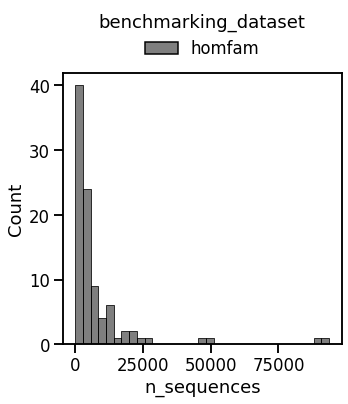

In [95]:
f, ax = plt.subplots(figsize=(5, 5))
sns.histplot(summary_homfam,
            x="n_sequences",
            hue = "benchmarking_dataset",
            log_scale=False, legend = True)
sns.move_legend(
    ax, "lower center",
    bbox_to_anchor=(.5, 1),
    frameon=False,
)

In [96]:
summary_homfam[summary_homfam.n_sequences > 25000].family

0             rvp
1         zf-CCHH
2             sdr
3    Acetyltransf
4             rrm
5             aat
Name: family, dtype: object

[Text(1000, 0, '1K'), Text(10000, 0, '10K'), Text(100000, 0, '100K')]

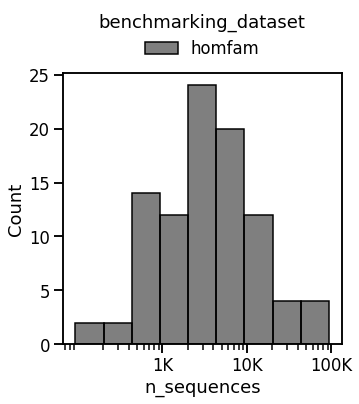

In [94]:
f, ax = plt.subplots(figsize=(5, 5))
ax = sns.histplot(summary_homfam,
            x="n_sequences",
            hue = "benchmarking_dataset",
            log_scale=True)
sns.move_legend(
    ax, "lower center",
    bbox_to_anchor=(.5, 1),
    frameon=False,
)
ax.set_xticks([1000, 10000, 100000])
ax.set_xticklabels(["1K", "10K", "100K"])

[Text(1000, 0, '1K'),
 Text(10000, 0, '10K'),
 Text(100000, 0, '100K'),
 Text(1000000, 0, '1M')]

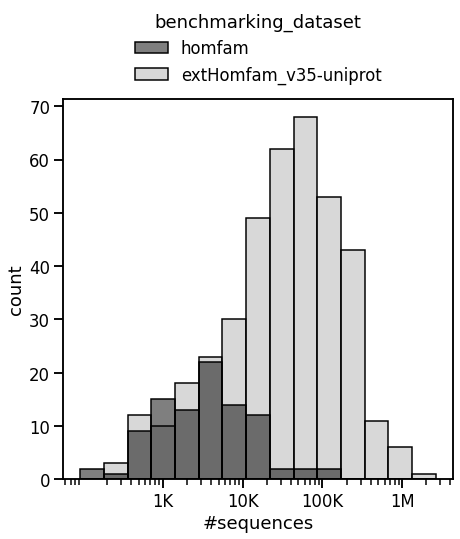

In [90]:
sns.set_context("talk")
flatui = ["black","#b3b3b3" ]
sns.set_palette(flatui)
f, ax = plt.subplots(figsize=(7, 7))

ax = sns.histplot(summary_homfam_exthomfam,
            x="n_sequences",
            hue = "benchmarking_dataset",
            log_scale=True)
sns.move_legend(
    ax, "lower center",
    bbox_to_anchor=(.5, 1),
    frameon=False,
)
ax.set(xlabel='#sequences', ylabel = "count")
ax.set_xticks([1000, 10000, 100000, 1000000])
ax.set_xticklabels(["1K", "10K", "100K", "1M"])


# Explore sequence length

In [3]:
summary_lengths = pd.read_csv(os.path.join("/home/luisasantus/Desktop/crg_cluster/data/structural_regression/stats/seq_lengths/summary_lengths.csv"))
summary_lengths.head(2)

### Other stats

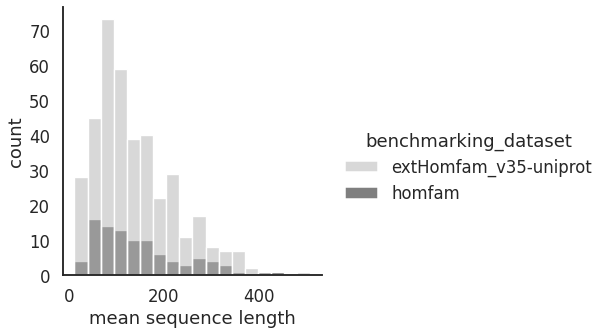

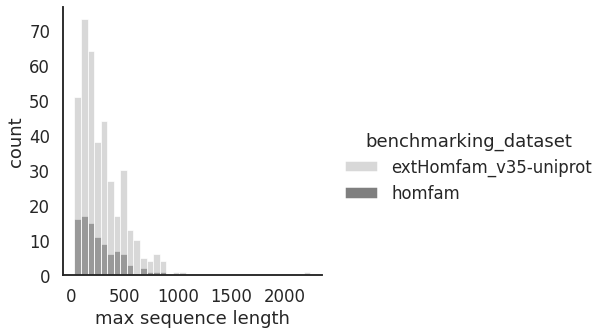

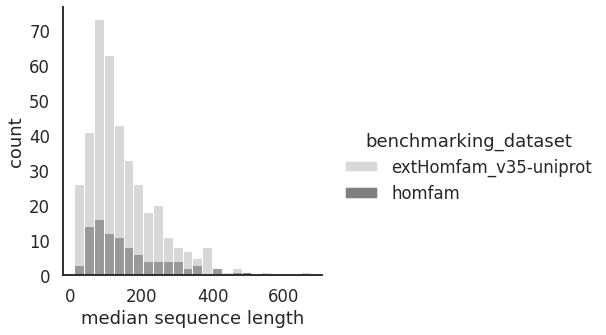

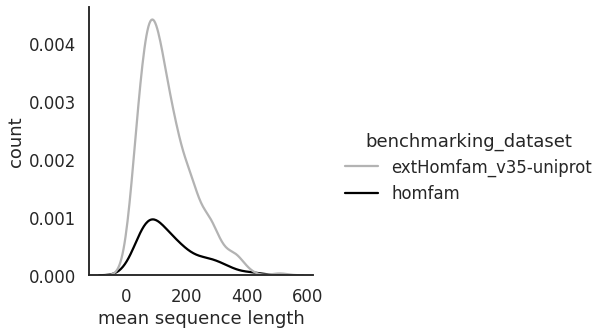

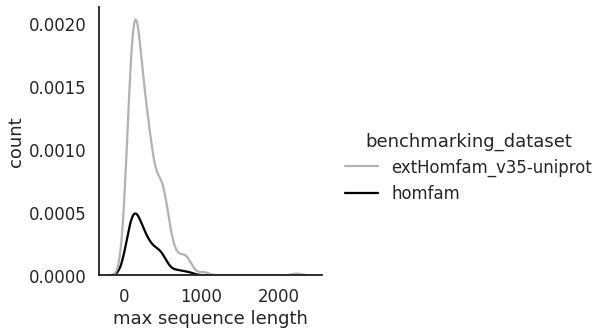

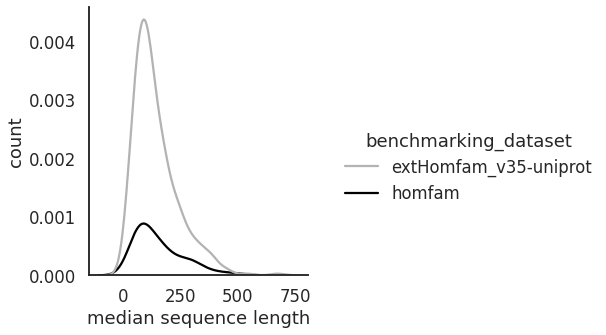

In [48]:
# Max sequence length across families (Homfam and Exthomfam)
sns.set_context("talk")
metrics = ["mean","max", "median"]
flatui = ["#b3b3b3", "black", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]
sns.set_palette(flatui)
for metric in metrics: 
    g = sns.displot(summary_lengths, x=metric, hue = "benchmarking_dataset")
    g.set(xlabel=metric+' sequence length', ylabel = "count")

for metric in metrics: 
    g = sns.displot(summary_lengths, x=metric, hue = "benchmarking_dataset",kind="kde")
    g.set(xlabel=metric+' sequence length', ylabel = "count")

### Which one is the super long? 

In [47]:
summary_lengths[summary_lengths["max"] > 2000]

,family,mean,median,max,benchmarking_dataset
183,ABC_tran,167.505647,148,2239,extHomfam_v35-uniprot
